# Projet : Data Pipeline pour l’Analyse des Données Clients
=====================================

***Structure du Projet***

1- Collecte des Données : Téléchargement et chargement du dataset dans un environnement Python.

2- Nettoyage et Préparation : Nettoyage des données avec Pandas.

3- Data Warehousing : Structuration des données dans une base de données SQL.

4- Analyse et Visualisation : Création de dashboards avec PowerBI.

5- Automatisation : Mise en place d’un pipeline CI/CD avec GitLab.

## 1- Collecte des données

In [ ]:
import pandas as pd

# Télécharger le dataset depuis Kaggle (à faire manuellement)
# Lien : https://www.kaggle.com/blastchar/telco-customer-churn

# Charger le dataset
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [21]:
# Aperçu des données
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2- Nettoyage et préparation

In [22]:
# Afficher des informations sur le DataFrame : types des colonnes, valeurs non nulles, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# Verificaiton des valeurs manquantes 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
# Supprimer les colonnes inutiles
df = df.drop(['customerID'], axis=1)

# Gérer les valeurs manquantes
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convertir les colonnes catégorielles en numériques
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [25]:
# Aperçu des données nettoyées
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 3- Data WareHouse

In [26]:
import mysql.connector

# Paramètres de connexion à la base de données MySQL
config = {
    'user': 'root',       # Remplacez par votre nom d'utilisateur MySQL
    'password': '',  # Remplacez par votre mot de passe MySQL
    'host': 'localhost',               # Remplacez par l'adresse du serveur MySQL
    'database': 'telco_data',          # Nom de la base de données
    'raise_on_warnings': True
}

# Établir la connexion
conn = mysql.connector.connect(**config)


In [29]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [30]:
# Créer un curseur pour exécuter des requêtes
cursor = conn.cursor()

# Créer la table 'customer_data' si elle n'existe pas
create_table_query = """
CREATE TABLE IF NOT EXISTS customer_data (
    gender VARCHAR(50),
    SeniorCitizen INT,
    Partner VARCHAR(50),
    Dependents VARCHAR(50),
    tenure INT,
    PhoneService VARCHAR(50),
    MultipleLines VARCHAR(50),
    InternetService VARCHAR(50),
    OnlineSecurity VARCHAR(50),
    OnlineBackup VARCHAR(50),
    DeviceProtection VARCHAR(50),
    TechSupport VARCHAR(50),
    StreamingTV VARCHAR(50),
    StreamingMovies VARCHAR(50),
    Contract VARCHAR(50),
    PaperlessBilling VARCHAR(50),
    PaymentMethod VARCHAR(50),
    MonthlyCharges FLOAT,
    TotalCharges FLOAT,
    Churn INT
);
"""
cursor.execute(create_table_query)
conn.commit()

In [31]:
# Charger les données dans la table
# df est notre DataFrame Pandas
for index, row in df.iterrows():
    insert_query = """
    INSERT INTO customer_data (
        gender, SeniorCitizen, Partner, Dependents, tenure,
        PhoneService, MultipleLines, InternetService, OnlineSecurity,
        OnlineBackup, DeviceProtection, TechSupport, StreamingTV,
        StreamingMovies, Contract, PaperlessBilling, PaymentMethod,
        MonthlyCharges, TotalCharges, Churn
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    cursor.execute(insert_query, tuple(row))
    conn.commit()

In [34]:
# Exemple de requête SQL
query = "SELECT * FROM customer_data WHERE Churn = 1"
cursor.execute(query)
churned_customers = pd.DataFrame(cursor.fetchall(), columns=df.columns)
print(churned_customers.head())

# Fermer la connexion
cursor.close()
conn.close()

ProgrammingError: 2055: Cursor is not connected

## 4. Analyse et Visualisation

Taux de churn : 26.54%


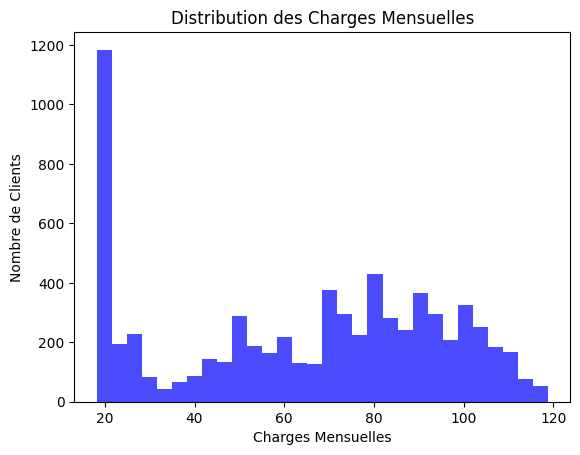

In [35]:
import matplotlib.pyplot as plt

# Analyse simple : Taux de churn
churn_rate = df['Churn'].mean() * 100
print(f"Taux de churn : {churn_rate:.2f}%")

# Visualisation : Distribution des charges mensuelles
plt.hist(df['MonthlyCharges'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution des Charges Mensuelles')
plt.xlabel('Charges Mensuelles')
plt.ylabel('Nombre de Clients')
plt.show()